### Analisa od dados do IDEB
---
Código feito por: Guilherme Almeida - 2019

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# maceteador de aspect ratio
def aspect_ratio_locker(aspect_ratio, multiplier):
    return([i * multiplier for i in aspect_ratio])

Um dos projetos do Ragazzo envolve o georreferenciamento dos dados do IDEB por escola dentro do município do Rio de Janeiro. Esse notebook tem como objetivo fazer uma exploração inicial desses dados para tentar identificar se isso é possível e como é possível.

Encontrei duas fontes de dados que talvez sejam suficientes para resolver o problema:

1) [Os microdados do SAEB](http://inep.gov.br/microdados), que mede o desempenho por escola;

2) [Os shapefiles do municipio sobre escolas municipais](http://portalgeo-pcrj.opendata.arcgis.com/).

Se houver correspondência dos dados de uma tabela para a outra, vamos conseguir montar o shapefile do município do Rio de Janeiro e, com isso, resolver o problema que o Ragazzo identificou.

### Índice

#### [Gráfico de pontos sobre o mapa do Rio](#pontos)

In [3]:
#importa os dados do município do Rio via gpd
map_municipio_rio = gpd.read_file("./shapefiles/Escolas_Municipais/Escolas_Municipais.shp", encoding = "latin1")

In [4]:
map_municipio_rio.shape

(1541, 52)

In [5]:
map_municipio_rio.columns

Index(['SMEDBOEsco', 'SMEDBOEs_1', 'SMEDBOEs_2', 'SMEDBOEs_3', 'SMEDBOEs_4',
       'SMEDBOEs_5', 'SMEDBOEs_6', 'SMEDBOEs_7', 'SMEDBOEs_8', 'SMEDBOEs_9',
       'SMEDBOEs10', 'SMEDBOEs11', 'SMEDBOEs12', 'SMEDBOEs13', 'SMEDBOEs14',
       'SMEDBOEs15', 'SMEDBOEs16', 'SMEDBOEs17', 'SMEDBOEs18', 'SMEDBOEs19',
       'SMEDBOEs20', 'SMEDBOEs21', 'SMEDBOEs22', 'SMEDBOEs23', 'SMEDBOEs24',
       'SMEDBOEs25', 'SMEDBOEs26', 'SMEDBOEs27', 'SMEDBOEs28', 'SMEDBOEs29',
       'SMEDBOEs30', 'SMEDBOEs31', 'SMEDBOEs32', 'SMEDBOEs33', 'SMEDBOEs34',
       'SMEDBODado', 'SMEDBODa_1', 'SMEDBODa_2', 'SMEDBODa_3', 'SMEDBODa_4',
       'SMEDBODa_5', 'SMEDBODa_6', 'SMEDBODa_7', 'SMEDBODa_8', 'SMEDBODa_9',
       'SMEDBODa10', 'SMEDBODa11', 'SMEDBODa12', 'SMEDBODa13', 'SMEDBODa14',
       'SMEDBODa15', 'geometry'],
      dtype='object')

In [6]:
map_municipio_rio.head()

,SMEDBOEsco,SMEDBOEs_1,SMEDBOEs_2,SMEDBOEs_3,SMEDBOEs_4,SMEDBOEs_5,SMEDBOEs_6,SMEDBOEs_7,SMEDBOEs_8,SMEDBOEs_9,...,SMEDBODa_7,SMEDBODa_8,SMEDBODa_9,SMEDBODa10,SMEDBODa11,SMEDBODa12,SMEDBODa13,SMEDBODa14,SMEDBODa15,geometry
0,1623,None,0101011,None,None,Escola Municipal FÃ©lix Mielli,"RUA CARLOS SEIXAS, S/N\n",4,Caju,01,...,None,None,None,None,None,None,None,None,0101011,POINT (681905.1161397779 7468701.711732268)
1,1179,017903,0101601,17903,33107122,Creche Municipal Ladeira dos FuncionÃ¡rios,RUA CARLOS SEIDL1281,4,Caju,01,...,0,0,0,0,0,0,6,6,0101601,POINT (682197.5185080497 7468804.991924365)
2,1185,018648,0101602,18648,33141177,Creche Municipal VirgÃ­nia Lemos,RUA PARAISO17,4,Caju,01,...,0,0,0,0,0,0,5,5,0101602,POINT (681274.0434351899 7468010.657843625)
3,1283,039772,0101607,39772,33156514,Creche Municipal Tia Dora,"Rua BarÃ£o da Gamboa, 203",2,GambÃ´a,01,...,0,0,0,0,0,0,2,8,0101607,POINT (684919.912878585 7466672.391474378)
4,1322,042939,0101801,42939,33519358,EspaÃ§o de Desenvolvimento Infantil Parque da ...,"Rua do Trem, SN",4,Caju,01,...,0,0,0,0,0,0,2,8,0101801,POINT (681505.6726194061 7468221.540531822)


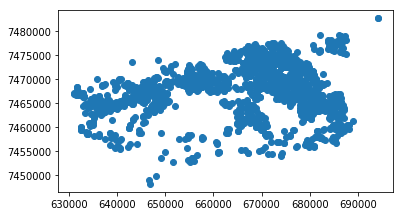

In [7]:
map_municipio_rio.plot()

In [9]:
map_municipio_rio["ID_ESCOLA"] = map_municipio_rio["SMEDBOEs_4"].apply(lambda x: str(x))

In [10]:
#importa os dados do SAEB pra completar o join
municipio_saeb = pd.read_csv("./microdados_saeb_2011/Arquivos Finais/Dados/TS_RESULTADO_ESCOLA.csv", sep = ";")

In [11]:
municipio_saeb.shape

(72808, 15)

In [12]:
municipio_saeb.loc[208, :]

ID_SAEB                              2011
ID_REGIAO                               1
ID_UF                                  11
ID_MUNICIPIO                      1100122
ID_ESCOLA                        11013494
ID_DEPENDENCIA_ADM                      2
ID_LOCALIZACAO                          1
ID_CAPITAL                              2
ID_SERIE                                5
NU_MATRICULADOS_CENSO                  62
NU_PRESENTES                            3
TAXA_PARTICIPACAO        4,83870967741935
ID_DIVULGACAO                           2
MEDIA_LP                                 
MEDIA_MT                                 
Name: 208, dtype: object

In [13]:
municipio_saeb["test"] = municipio_saeb["MEDIA_LP"].apply(lambda x: len(x))

In [14]:
municipio_saeb.dropna(subset = ["MEDIA_LP", "MEDIA_MT"], inplace = True)
municipio_saeb = municipio_saeb.query("test > 3")
municipio_saeb["nota_geral"] = municipio_saeb.apply(lambda x: float(x.MEDIA_LP.replace(",", ".")) + float(x.MEDIA_MT.replace(",", ".")), axis = 1)

In [15]:
municipio_saeb["ID_ESCOLA"] = municipio_saeb["ID_ESCOLA"].apply(lambda x: str(x))

In [16]:
#junta tudo
joined_tables = pd.merge(map_municipio_rio, municipio_saeb, how = "left", on = "ID_ESCOLA")

In [17]:
joined_tables.shape

(1739, 69)

Com isso, conseguí mostrar que de fato é possível fazer o georreferenciamento das escolas do município do Rio de Janeiro de maneira bastante precisa. O próximo passo é usar os dados para montar o mapa de calor das notas do município do Rio de Janeiro no SAEB.

In [18]:
joined_tables.dropna(subset = ["nota_geral"], inplace = True)

In [19]:
joined_tables["nota_geral"] = joined_tables["nota_geral"].apply(lambda x: float(x))

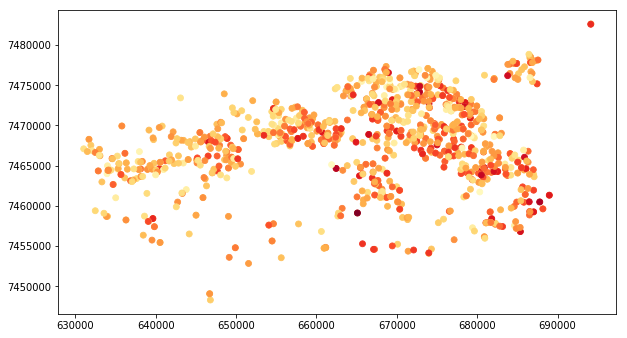

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 6))

joined_tables.plot(
    column='nota_geral', cmap='YlOrRd', linewidth=0.8, ax=ax)

O ideal seria ter um shapefile do Rio de Janeiro com os bairros bonitinhos. Para testar se dá pra fazer isso, vou pegar o mapa que em tese contém dados mais gerais sobre o município e ver se ele plota direitinho ou não.

In [21]:
map_geral_rio = gpd.read_file("./shapefiles/Limite_Bairro/Limite_Bairro.shp", encoding = "latin1")

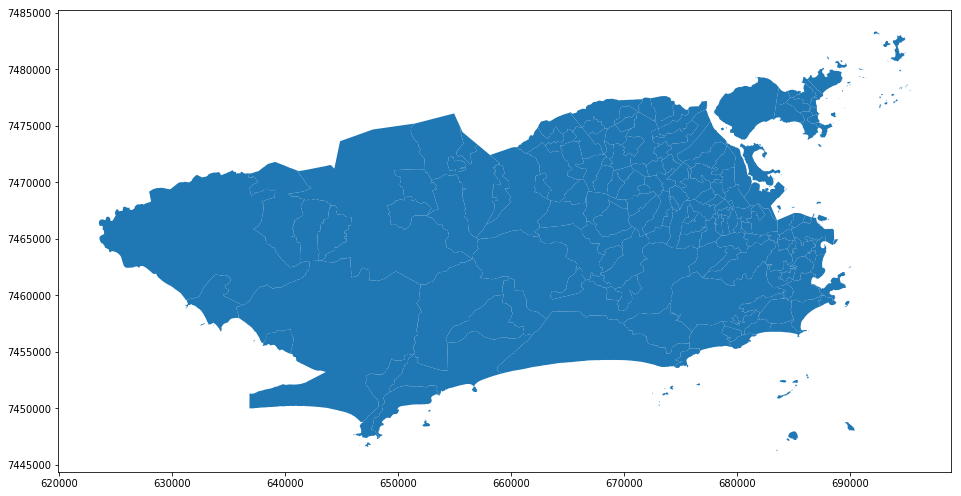

In [22]:
map_geral_rio.plot(figsize=aspect_ratio_locker([16, 9], 1))

<a id="pontos"></a>
## Gráfico de pontos sobre o mapa do município

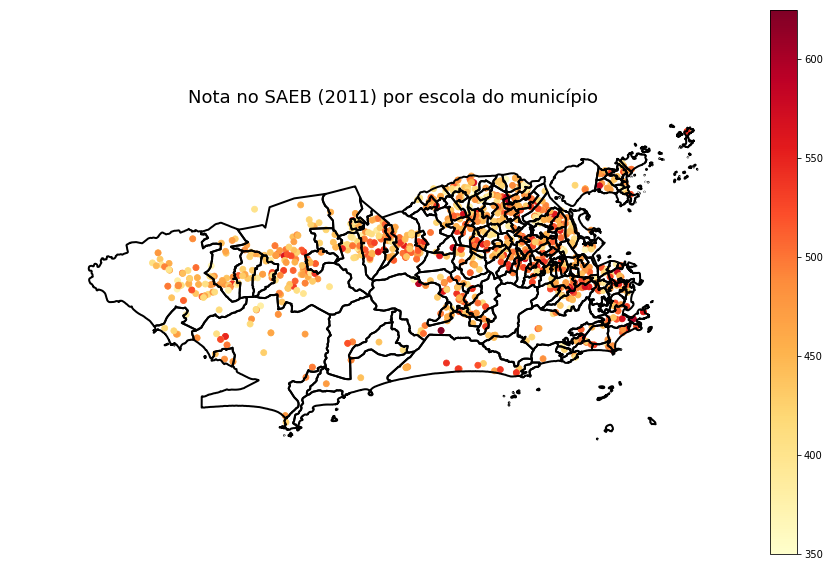

In [44]:
fig, ax = plt.subplots(1, figsize=(15, 10))

joined_tables.plot(
    column='nota_geral', cmap='YlOrRd', linewidth=0.8, ax=ax, legend = True)

map_geral_rio.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax) #Use your second dataframe

plt.axis('off')

plt.title("Nota no SAEB (2011) por escola do município", fontsize = 18)

plt.savefig("point_map.png", dpi = 600)

<a id="bairros"></a>
## Gráfico por bairro

O mais interessante vai ser atgregar as informações sobre cada uma das escolas pela média do bairro para verificar a hipótese de que há uma variabilidade alta de notas entre os diferentes bairros.

In [47]:
joined_tables.columns

Index(['SMEDBOEsco', 'SMEDBOEs_1', 'SMEDBOEs_2', 'SMEDBOEs_3', 'SMEDBOEs_4',
       'SMEDBOEs_5', 'SMEDBOEs_6', 'SMEDBOEs_7', 'SMEDBOEs_8', 'SMEDBOEs_9',
       'SMEDBOEs10', 'SMEDBOEs11', 'SMEDBOEs12', 'SMEDBOEs13', 'SMEDBOEs14',
       'SMEDBOEs15', 'SMEDBOEs16', 'SMEDBOEs17', 'SMEDBOEs18', 'SMEDBOEs19',
       'SMEDBOEs20', 'SMEDBOEs21', 'SMEDBOEs22', 'SMEDBOEs23', 'SMEDBOEs24',
       'SMEDBOEs25', 'SMEDBOEs26', 'SMEDBOEs27', 'SMEDBOEs28', 'SMEDBOEs29',
       'SMEDBOEs30', 'SMEDBOEs31', 'SMEDBOEs32', 'SMEDBOEs33', 'SMEDBOEs34',
       'SMEDBODado', 'SMEDBODa_1', 'SMEDBODa_2', 'SMEDBODa_3', 'SMEDBODa_4',
       'SMEDBODa_5', 'SMEDBODa_6', 'SMEDBODa_7', 'SMEDBODa_8', 'SMEDBODa_9',
       'SMEDBODa10', 'SMEDBODa11', 'SMEDBODa12', 'SMEDBODa13', 'SMEDBODa14',
       'SMEDBODa15', 'geometry', 'ID_ESCOLA', 'ID_SAEB', 'ID_REGIAO', 'ID_UF',
       'ID_MUNICIPIO', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_CAPITAL',
       'ID_SERIE', 'NU_MATRICULADOS_CENSO', 'NU_PRESENTES',
       'TAXA_P

A coluna que contém o ID do Bairro na "joined_table" é SMEDBOEs_7. Para conseguir pegar os dados da nota_geral por bairro, acho que o caminho é usar um groupby nesse dataframe por essa coluna pegando apenas a média de "nota_geral" e usar o resultado para fazer um join com map_geral_rio. Aí mapa_geral_rio se torna suficiente para gerar o mapa que quero.

In [61]:
notas_por_bairro = pd.DataFrame(joined_tables.groupby("SMEDBOEs_7")["nota_geral"].mean())
notas_por_bairro.reset_index(inplace = True)
notas_por_bairro.columns = ["CODBAIRRO", "nota_geral"]
notas_por_bairro["CODBAIRRO"] = notas_por_bairro["CODBAIRRO"].apply(lambda x: int(x))
notas_por_bairro.tail()

,CODBAIRRO,nota_geral
143,95,443.875
144,96,458.420
145,97,450.185
146,98,445.575
147,99,484.244


In [62]:
#faz o join entre notas_por_bairro e mapa_geral_rio
mapa_geral_rio_com_notas = pd.merge(map_geral_rio, notas_por_bairro, how = "left", on = "CODBAIRRO")

In [67]:
mapa_geral_rio_com_notas.dropna(subset = ["nota_geral"], inplace = True)

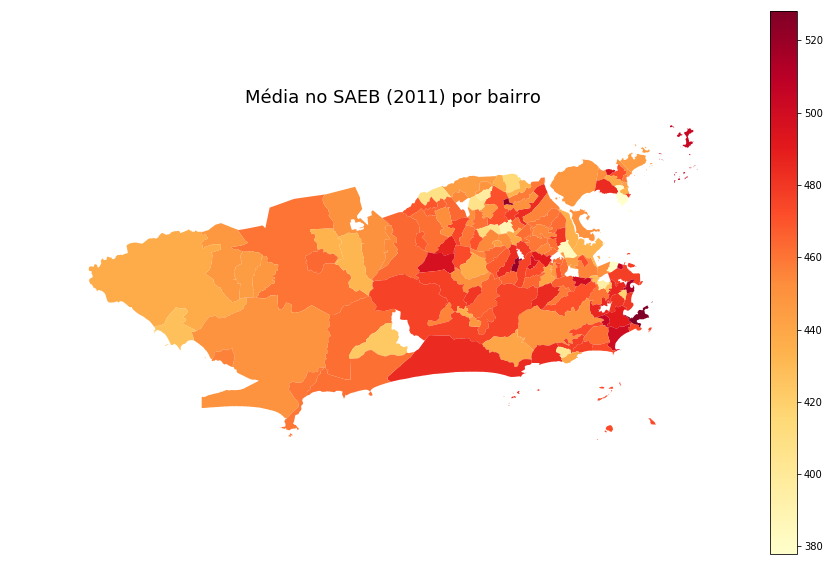

In [69]:
mapa_geral_rio_com_notas.plot(column='nota_geral', cmap='YlOrRd', linewidth=0.8, figsize=(15, 10), legend = True)

plt.axis('off')

plt.title("Média no SAEB (2011) por bairro", fontsize = 18)

plt.savefig("area_map.png", dpi = 600)